In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
real_data = pd.read_csv('datasets/breast.csv')
real_data['Diagnosis'] = real_data['Diagnosis'].map({'M':0, 'B':1})
synthetic_data = pd.read_csv('synthetic/GCSbc.csv')
synthetic_data['Diagnosis'] = synthetic_data['Diagnosis'].map({'M':0, 'B':1})

### Descriptive Statistics Comparison

In [26]:
real_data_stats = real_data.describe().transpose()
synthetic_data_stats = synthetic_data.describe().transpose()

absolute_difference_stats = (real_data_stats - synthetic_data_stats)
percentage_difference_stats = (absolute_difference_stats / real_data_stats) * 100
percentage_difference_stats.drop('count',axis=1,inplace=True)
percentage_difference_stats = percentage_difference_stats.add_suffix('_in_%')
percentage_difference_stats

,mean_in_%,std_in_%,min_in_%,25%_in_%,50%_in_%,75%_in_%,max_in_%
radius1,-1.753716,-1.529463,-7.397902,-1.419590,-3.464552,-4.140018,0.000000
texture1,-0.765200,1.825491,-6.245199,-1.301504,-0.454019,-1.926854,15.930838
perimeter1,-1.815415,-0.465483,-6.706901,-1.456321,-3.908078,-3.340462,0.000000
area1,-3.519551,4.032969,-24.237656,-2.583072,-9.878071,-9.258252,0.000000
smoothness1,-0.290645,3.603170,-2.548569,-0.885185,-0.568842,-0.710574,16.050299
compactness1,-1.476505,6.237129,-38.214715,-5.009290,-4.270032,-4.353703,0.000000
concavity1,-4.618267,4.792843,-inf,-18.987818,-19.402917,-4.925314,11.509803
concave_points1,-0.854535,-1.779609,-inf,11.663543,-19.819560,4.066847,0.614933
symmetry1,-0.411671,1.191315,-11.602121,-0.381033,0.002070,-1.431563,0.000000
fractal_dimension1,0.068006,2.999060,0.000000,-0.299259,0.070587,-0.189035,1.637041


### Distributions

In [27]:
def plot_distributions(real_data, synthetic_data, show_figures = 40):
    columns = real_data.columns
    for i, column in enumerate(columns):
        if i >= show_figures:
            break
        real_data[column].plot(kind='density', label='Real Data', color='blue')
        synthetic_data[column].plot(kind='density', label='Synthetic Data', color='orange')
        plt.title(f'Distribution of {column}')
        plt.legend()
        plt.tight_layout()
        plt.show()

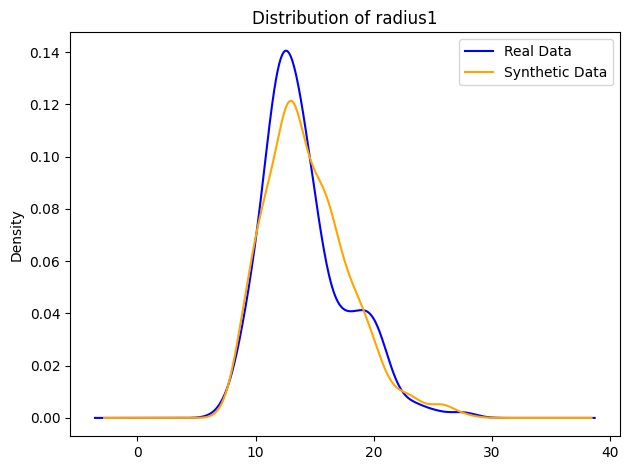

In [28]:
plot_distributions(real_data, synthetic_data, show_figures=1)

###  Correlation Analysis

In [ ]:
correlation_real = real_data.corr()
correlation_synthetic = synthetic_data.corr()

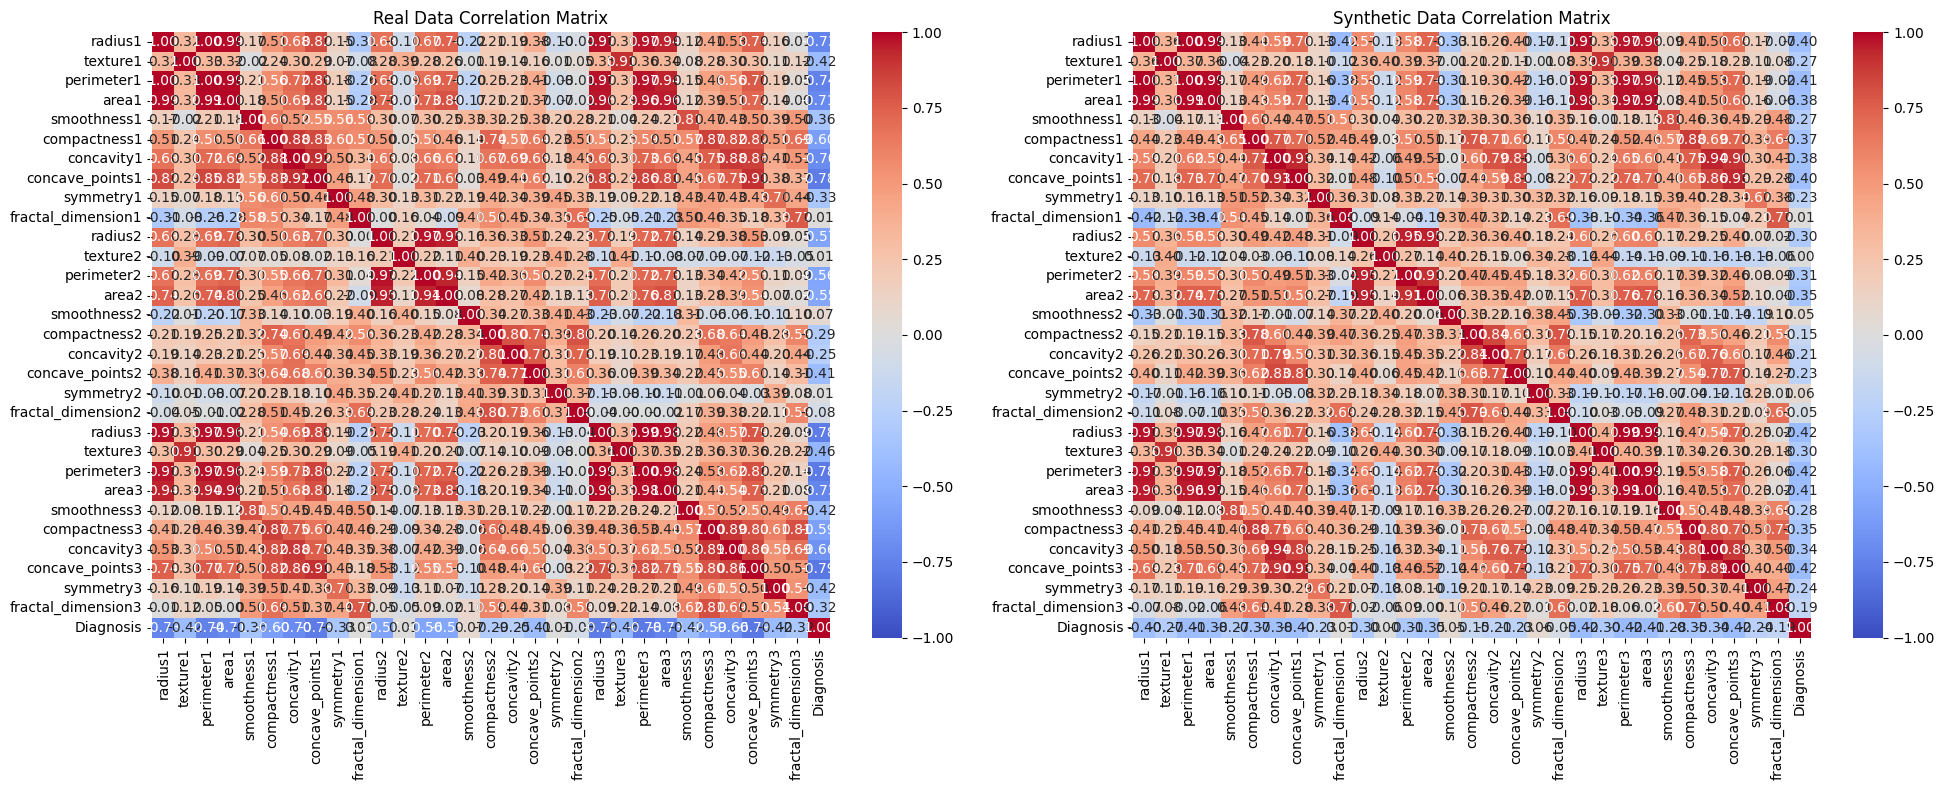

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.heatmap(correlation_real, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Real Data Correlation Matrix')
sns.heatmap(correlation_synthetic, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Synthetic Data Correlation Matrix')
plt.tight_layout()
plt.show()

#### Difference Correlation Maxtrix

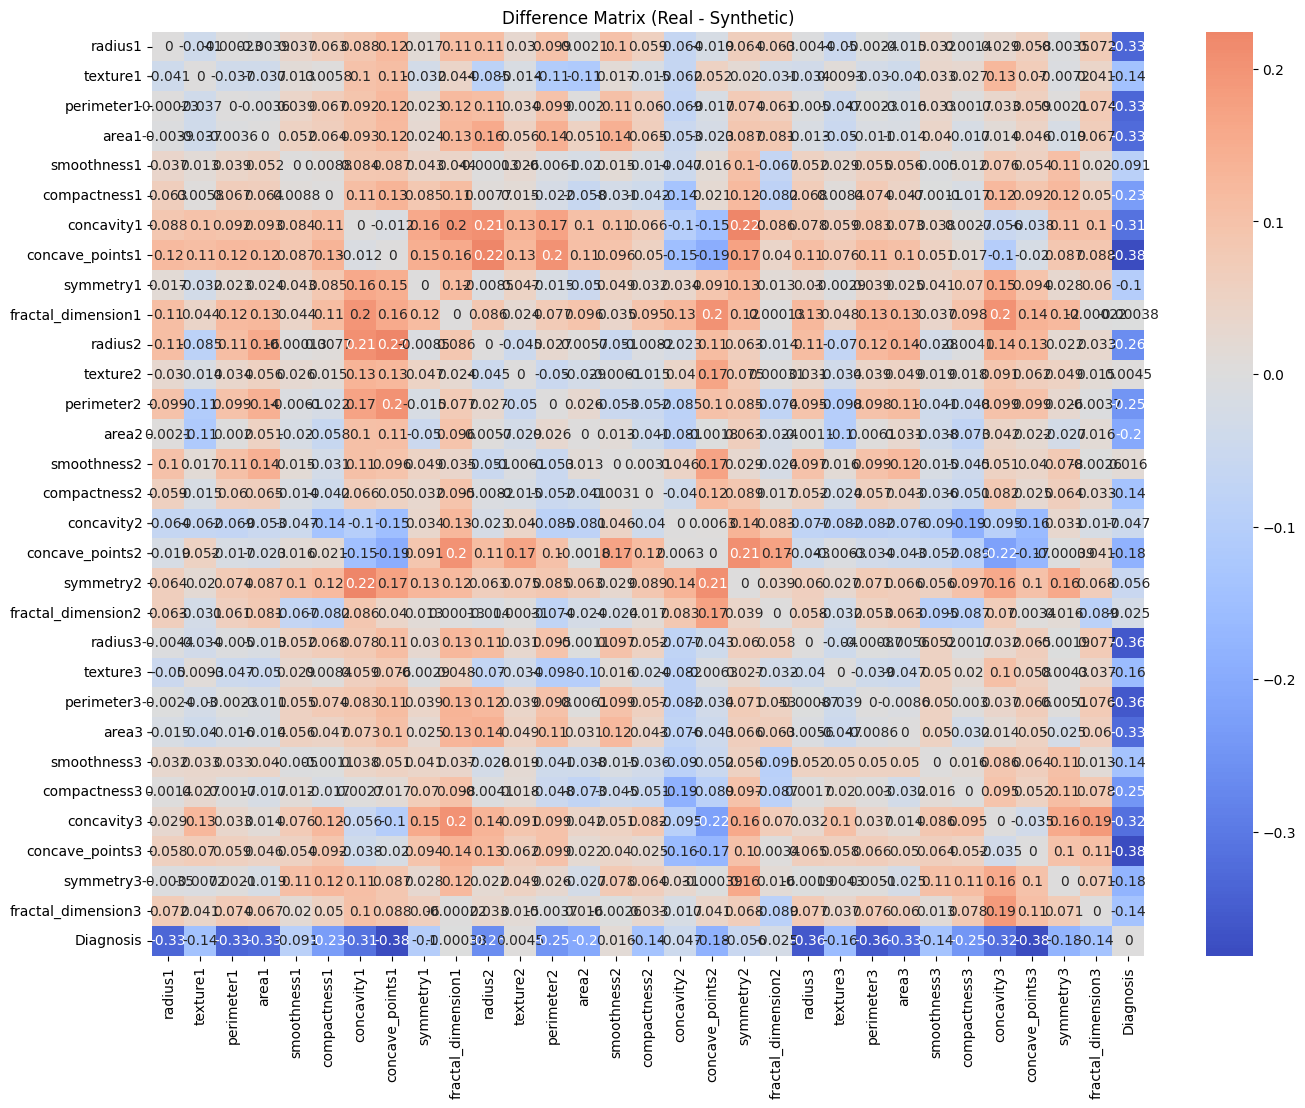

In [31]:
difference_matrix = correlation_real - correlation_synthetic
plt.figure(figsize=(16, 12)) 
sns.heatmap(difference_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Difference Matrix (Real - Synthetic)')
plt.show()

Correlation of Correlations

In [32]:
# Extract the upper triangular part of the correlation matrices excluding the diagonal
triu_indices = np.triu_indices_from(correlation_real, k=1)
real_upper = correlation_real.values[triu_indices]
synthetic_upper = correlation_synthetic.values[triu_indices]
# Compute the correlation between the upper triangular values
comparison_corr = np.corrcoef(real_upper, synthetic_upper)[0, 1]
print(f'Correlation between real and synthetic correlation matrices: {comparison_corr}')

Correlation between real and synthetic correlation matrices: 0.964766364420517
